In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/sample_data/employee_having_car.csv')

In [4]:
dataset

,Unnamed: 0,Age,Gender,Salary,Car
0,0,19,M,30800,0
1,1,35,M,32000,0
2,2,26,F,59600,0
3,3,27,F,76400,0
4,4,19,M,99200,0
...,...,...,...,...,...
375,375,46,F,46400,1
376,376,46,F,96800,0
377,377,42,F,71600,0
378,378,41,M,112400,1


In [5]:
dataset['Gender'] = dataset['Gender'].replace(to_replace=['M','F'], value=[1,0])

In [10]:
X = dataset.iloc[:, [1,2,3]].values
X

array([[    19,      1,  30800],
       [    35,      1,  32000],
       [    26,      0,  59600],
       ...,
       [    42,      0,  71600],
       [    41,      1, 112400],
       [    58,      0,  35600]])

In [11]:
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [13]:
y.shape

(380,)

In [12]:
X.shape

(380, 3)

Splitting thr Dataset

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(304, 3)
(304,)
(76, 3)
(76,)


Feature Scaling

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print(X_test[:5])

[[-0.9502434  -1.00660073  0.74226747]
 [ 0.99700293 -1.00660073  1.2337522 ]
 [ 0.12074208  0.99344255  0.01949581]
 [ 2.16535073 -1.00660073  0.16405015]
 [ 2.26271304 -1.00660073  1.08919787]]


Model Setup

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',
                               max_depth = 5,
                               min_samples_leaf = 4,
                               random_state = 25)

Training

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=25)

Predicting on Test Data

In [37]:
y_pred = model.predict(X_test)

In [38]:
yy = list(zip(y_test, y_pred))
yy[:10]

[(1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

Evaluate Model

In [39]:
from sklearn.metrics import accuracy_score 

In [40]:
accuracy_score(y_test, y_pred)*100

86.8421052631579

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)

In [43]:
cm

array([[42,  4],
       [ 6, 24]])

In [44]:
import seaborn as sns

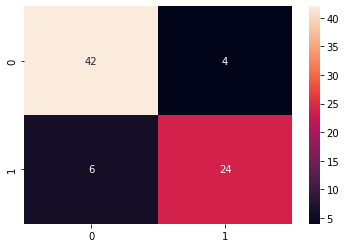

In [45]:
sns.heatmap(cm, annot=True)

Predicting On Single Value

In [51]:
x1 = scaler.transform([[46, 1, 35600]])

In [52]:
y1 = model.predict(x1)
print(y1[0])

1
